استيراد المكتبات اللازمة

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set English fonts and styles
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'sans-serif'
sns.set_style('whitegrid')

**تحميل البيانات
**

In [2]:
# رفع الملف مباشرة
from google.colab import files
uploaded = files.upload()

# قراءة البيانات
import io
df = pd.read_csv(io.BytesIO(uploaded['FAOSTAT_data_en_4-10-2025.csv']), encoding='utf-8')

# عرض أول 5 صفوف للتأكد من صحة القراءة
df.head()

Saving FAOSTAT_data_en_4-10-2025.csv to FAOSTAT_data_en_4-10-2025.csv


,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,504,Morocco,2014,2014,23014,Food price inflation,7001,January,6121,Value,%,-0.573770,E,Estimated value,NaN
1,CP,Consumer Price Indices,504,Morocco,2014,2014,23014,Food price inflation,7002,February,6121,Value,%,-1.149425,E,Estimated value,NaN
2,CP,Consumer Price Indices,504,Morocco,2014,2014,23014,Food price inflation,7003,March,6121,Value,%,-0.912863,E,Estimated value,NaN
3,CP,Consumer Price Indices,504,Morocco,2014,2014,23014,Food price inflation,7004,April,6121,Value,%,-0.913621,E,Estimated value,NaN
4,CP,Consumer Price Indices,504,Morocco,2014,2014,23014,Food price inflation,7005,May,6121,Value,%,-2.302632,E,Estimated value,NaN


تنظيف البيانات واستكشافها

In [3]:
# التحقق من المعلومات الأساسية
df.info()

# التحقق من القيم الفارغة
df.isnull().sum()

# اختيار الأعمدة المهمة فقط
df = df[['Year', 'Months', 'Value']]

# تحويل الأشهر إلى ترتيب عددي لسهولة الفرز
month_order = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
               'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['Month_num'] = df['Months'].map(month_order)

# فرز البيانات حسب السنة والشهر
df = df.sort_values(['Year', 'Month_num'])

# إعادة تعيين الفهرس
df = df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       129 non-null    object 
 1   Domain            129 non-null    object 
 2   Area Code (M49)   129 non-null    int64  
 3   Area              129 non-null    object 
 4   Year Code         129 non-null    int64  
 5   Year              129 non-null    int64  
 6   Item Code         129 non-null    int64  
 7   Item              129 non-null    object 
 8   Months Code       129 non-null    int64  
 9   Months            129 non-null    object 
 10  Element Code      129 non-null    int64  
 11  Element           129 non-null    object 
 12  Unit              129 non-null    object 
 13  Value             129 non-null    float64
 14  Flag              129 non-null    object 
 15  Flag Description  129 non-null    object 
 16  Note              0 non-null      float64
dt

<ipython-input-3-21f1f4f0115f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_num'] = df['Months'].map(month_order)


التحليل الإحصائي الأساسي

In [4]:
# الإحصائيات الوصفية
print("الإحصائيات الوصفية لمعدلات التضخم:")
print(df['Value'].describe())

# متوسط التضخم السنوي
annual_avg = df.groupby('Year')['Value'].mean().reset_index()
print("\nمتوسط التضخم السنوي:")
print(annual_avg)

الإحصائيات الوصفية لمعدلات التضخم:
count    129.000000
mean       2.814475
std        5.156021
min       -3.150242
25%       -0.913621
50%        1.517047
75%        3.382838
max       20.837298
Name: Value, dtype: float64

متوسط التضخم السنوي:
    Year      Value
0   2014  -1.198992
1   2015   2.569030
2   2016   2.807195
3   2017   0.018993
4   2018   0.968546
5   2019  -1.244789
6   2020   0.878699
7   2021   0.600772
8   2022  11.241777
9   2023  13.085481
10  2024   0.705198


التصورات البيانية

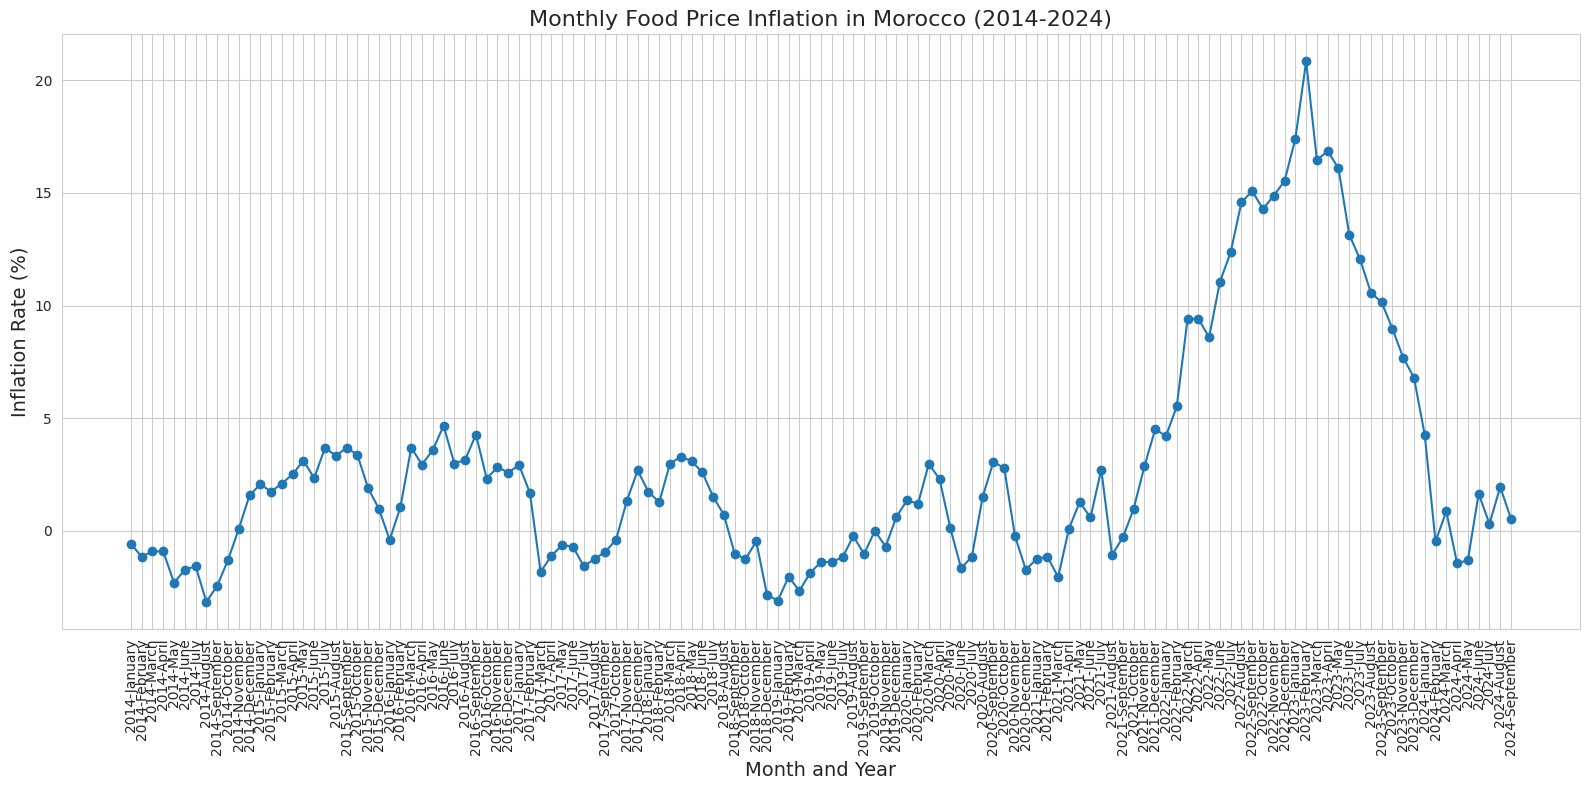

In [13]:
plt.figure(figsize=(16, 8))
plt.plot(df['Year'].astype(str) + '-' + df['Months'], df['Value'], marker='o')
plt.title('Monthly Food Price Inflation in Morocco (2014-2024)', fontsize=16)
plt.xlabel('Month and Year', fontsize=14)
plt.ylabel('Inflation Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

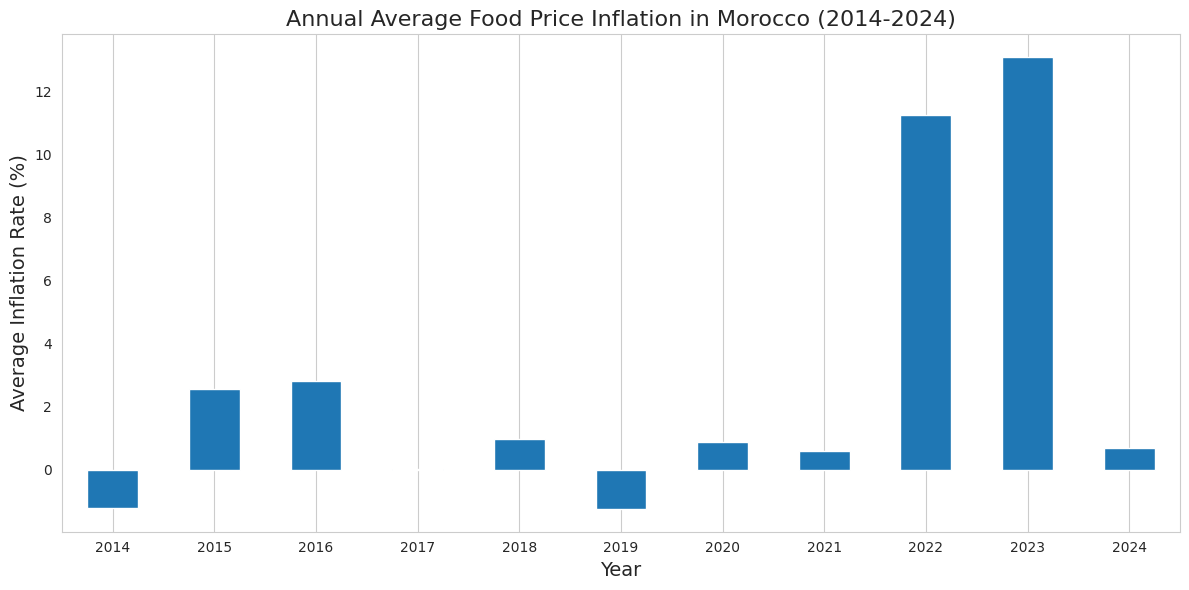

In [14]:
plt.figure(figsize=(12, 6))
annual_avg.plot(kind='bar', x='Year', y='Value', legend=False)
plt.title('Annual Average Food Price Inflation in Morocco (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Inflation Rate (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

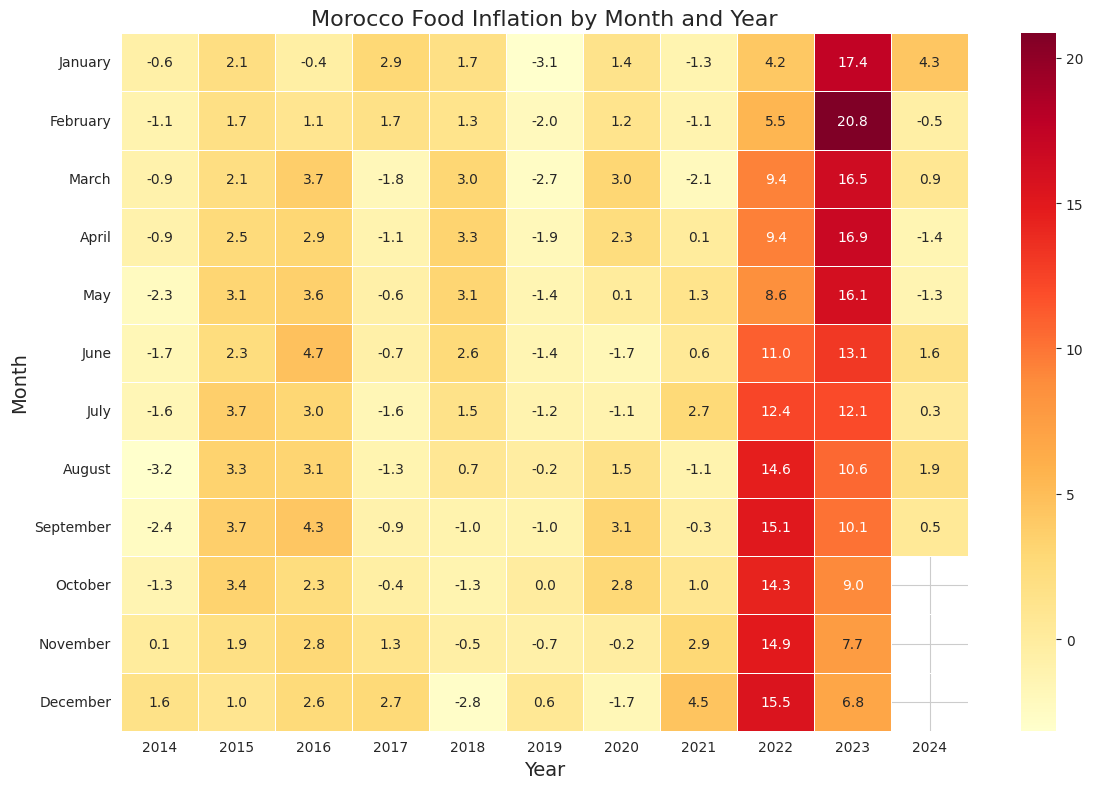

In [20]:
# First create the pivot table for the heatmap
heatmap_data = df.pivot(index="Months", columns="Year", values="Value")

# Reorder months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(month_order)

# Now create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title('Morocco Food Inflation by Month and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.tight_layout()
plt.show()

 تحليل الاتجاهات

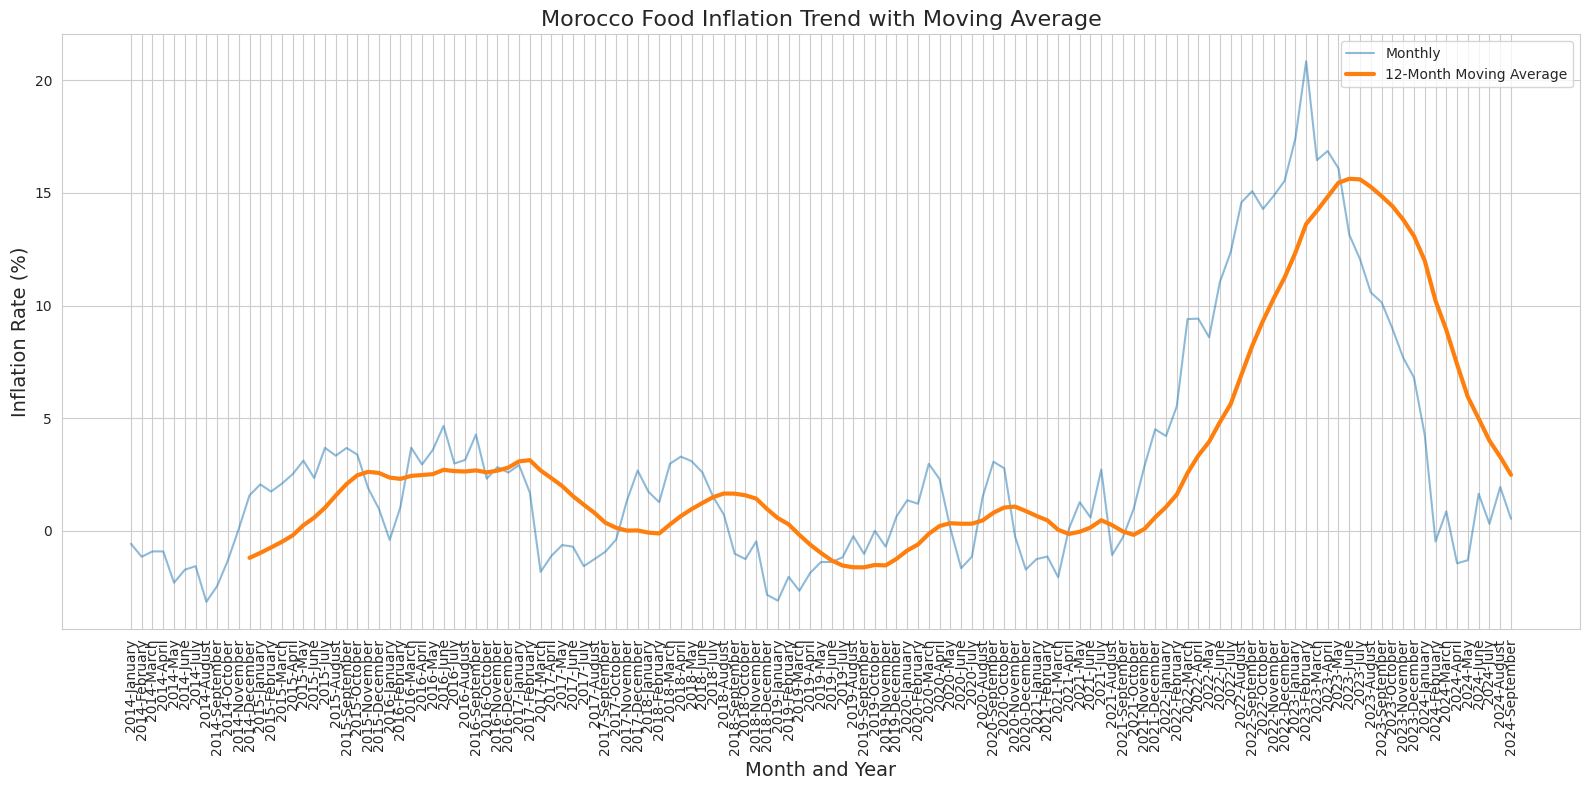

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(df['Year'].astype(str) + '-' + df['Months'], df['Value'], label='Monthly', alpha=0.5)
plt.plot(df['Year'].astype(str) + '-' + df['Months'], df['12_month_MA'],
         label='12-Month Moving Average', linewidth=3)
plt.title('Morocco Food Inflation Trend with Moving Average', fontsize=16)
plt.xlabel('Month and Year', fontsize=14)
plt.ylabel('Inflation Rate (%)', fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

تحليل الفترات الحرجة

In [9]:
# أعلى 10 أشهر من حيث التضخم
top_inflation = df.nlargest(10, 'Value')
print("أعلى 10 أشهر من حيث التضخم:")
print(top_inflation[['Year', 'Months', 'Value']])

# أقل 10 أشهر من حيث التضخم (أكبر انكماش)
low_inflation = df.nsmallest(10, 'Value')
print("\nأقل 10 أشهر من حيث التضخم:")
print(low_inflation[['Year', 'Months', 'Value']])

أعلى 10 أشهر من حيث التضخم:
     Year     Months      Value
109  2023   February  20.837298
108  2023    January  17.403846
111  2023      April  16.858917
110  2023      March  16.453382
112  2023        May  16.088889
107  2022   December  15.532119
104  2022  September  15.077821
106  2022   November  14.875240
103  2022     August  14.581281
105  2022    October  14.285714

أقل 10 أشهر من حيث التضخم:
    Year     Months     Value
7   2014     August -3.150242
60  2019    January -3.098373
59  2018   December -2.839601
62  2019      March -2.660407
8   2014  September -2.446982
4   2014        May -2.302632
86  2021      March -2.059631
61  2019   February -2.039216
63  2019      April -1.866252
38  2017      March -1.819620


كتابة التقرير النهائي

## خلاصة التحليل

1. **الاتجاه العام**: شهد المغرب تقلبات كبيرة في التضخم الغذائي بين 2014 و2024، مع فترات انكماش (2014، 2019) وارتفاع حاد (2022-2023).

2. **الذروة التاريخية**: سجل فبراير 2023 أعلى معدل تضخم عند 20.84%.

3. **الانكماش القياسي**: أغسطس 2014 شهد أكبر انكماش عند -3.10%.

4. **الاتجاه الحديث**: بدأ التضخم في التراجع خلال 2024 بعد ذروته في 2023.

5. **التوزيع الموسمي**: لا يوجد نمط موسمي واضح، لكن بعض السنوات تظهر ارتفاعًا في نهاية العام.

## التوصيات

1. تعزيز سياسات الأمن الغذائي لمواجهة التقلبات الحادة.
2. دراسة أسباب الارتفاع الحاد في 2022-2023 لتجنب تكراره.
3. تطوير نظام إنذار مبكر لتقلبات الأسعار.